<a href="https://colab.research.google.com/github/SunnyAgrawal1208/StockPricePrediction/blob/main/StockMarketPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
#Description: This program shows you how to create a artificial recurrent neural network called Long Short Term Memory(LSTM).
# How to predict the closing stock price of a corporation (Apple Inc.).

In [1]:
#Importing the required libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') #just the matplotlib style named as fivethirtyeight

In [3]:
#Getting the stock quote 
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2020-10-1') #dataframe captured using yahoo finances api

df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732142,14.607142,14.621428,14.686786,302220800.0,12.691425
2012-01-04,14.810000,14.617143,14.642858,14.765715,260022000.0,12.759631
2012-01-05,14.948215,14.738214,14.819643,14.929643,271269600.0,12.901293
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,13.036158
2012-01-09,15.276786,15.048214,15.196428,15.061786,394024400.0,13.015480
...,...,...,...,...,...,...
2020-09-25,112.440002,107.669998,108.430000,112.279999,149981400.0,112.279999
2020-09-28,115.320000,112.779999,115.010002,114.959999,137672400.0,114.959999
2020-09-29,115.309998,113.570000,114.550003,114.089996,99382200.0,114.089996


In [4]:
df.shape #Showing number of rows and cols

(2202, 6)

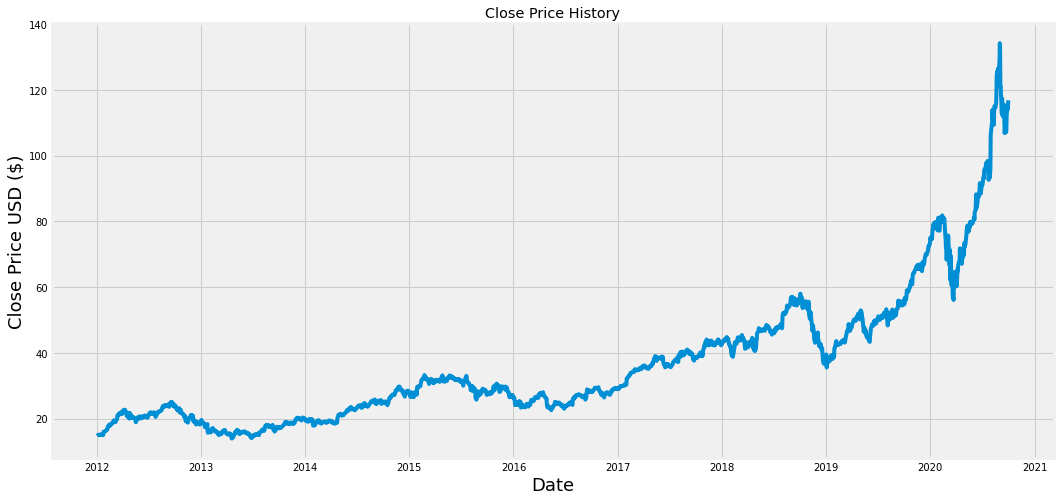

In [5]:
#Plotting the closing price history graph using matplotlib library
plt.figure(figsize=(16,8),edgecolor='Black')  #Graph with 16 inch width and 8 inch height and border color black
plt.title('Close Price History')  #Title of the graph
plt.plot(df['Close']) #Plotting using dataframe df with only colomn name close
plt.xlabel('Date',fontsize=18)  #label of graph on x-axis
plt.ylabel('Close Price USD ($)',fontsize=18) #label of graph on y-axis
plt.show()

In [18]:
#Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])
#Converting the dataframe to a numpy array
dataset = data.values
#Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8) #Considering the 80% of data in training data

In [7]:
#Scale all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) #Using MinMaxScaler function for scaling the data as it is good if we use preprocessed data
scaled_data = scaler.fit_transform(dataset) #Transforming the dataset into scaled data in range of 0 and 1 inclusive.

In [10]:
#Create the scaled training data set 
train_data = scaled_data[0:training_data_len  , : ] #Taking rows from 0 to 80% of whole data and all columns
#Split the data into x_train and y_train data sets
x_train=[]
y_train = []

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])  #x train contains 1st 59 data set
    y_train.append(train_data[i,0]) #y train contains remaining data sets

In [12]:
#Convert x_train and y_train to numpy arrays, so we can use them for training
x_train, y_train = np.array(x_train), np.array(y_train)

In [13]:
#Reshape the data into the shape accepted by the LSTM that is 3 dimensional
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [14]:
#Build the LSTM network model
model = Sequential()  #Building model using keras library
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1))) #1st LSTM layer with 50 neurons and kepping return sequences to true
model.add(LSTM(units=50, return_sequences=False)) #2nd LSTM layer with 50 neurons and kepping return sequences to false
model.add(Dense(units=25))  #3rd Dense layer of 25 neurons
model.add(Dense(units=1)) #4th Dense layer of 25 neurons

In [15]:
#Compile the model
#Adam optimizer is used because it is straight forward to use and it can be used instead of Stochastic optimization
#mean_squared_parameter Computes the mean of squares of errors between labels and predictions
model.compile(optimizer='adam', loss='mean_squared_error')

In [16]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1) 
#fit is another name for train
#batch size is total number of training example present 
#epochs is number of iterations when entire data set is passed forward or backward through neural network

1702/1702 [==============================] - 35s 20ms/step - loss: 2.3204e-04


In [19]:
#Test data set
test_data = scaled_data[training_data_len - 60: , : ]
#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] 
#Get all of the rows from index 1762 to the rest and all of the columns (in this case it's only column 'Close'), so 2202 - 1762 = 440 rows of data

for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [20]:
#Convert x_test to a numpy array 
x_test = np.array(x_test)

In [21]:
#Similarly, reshape the data into the shape accepted by the LSTM that is 3 dimensional
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [22]:
#Getting the models predicted price values by test data
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)#When the binary labels are fractional, inverse_transform chooses the class with the greatest value

In [23]:
#Calculating the value of RootMeanSquaredError(RMSE)
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse
#It is a great way to find how accurate the model is
#The lower the value, the better is the model performing

3.4960090001529744

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


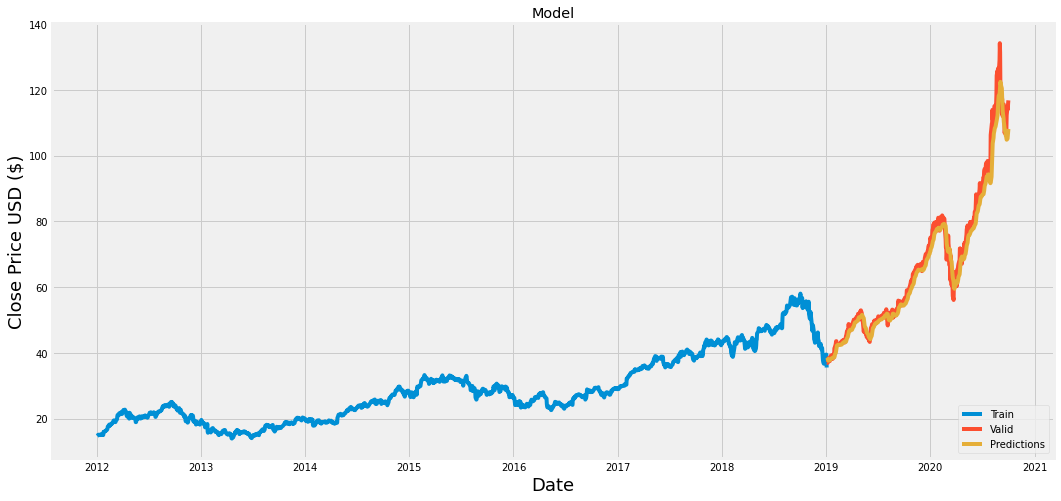

In [24]:
#Plot the data for the graph
train = data[:training_data_len]  #This is the range on what the model is trained on
valid = data[training_data_len:]  #This is the predicted data 
valid['Predictions'] = predictions

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Valid', 'Predictions'], loc='lower right')
plt.show()

In [25]:
#Showing the valid and predicted prices
valid

,Close,Predictions
Date,,
2019-01-04,37.064999,38.545105
2019-01-07,36.982498,38.163528
2019-01-08,37.687500,37.823097
2019-01-09,38.327499,37.640125
2019-01-10,38.450001,37.641167
...,...,...
2020-09-25,112.279999,104.828369
2020-09-28,114.959999,105.102974
2020-09-29,114.089996,106.031990


In [26]:
#So, this is the whole project and the accuracy is very good and the predicted values are very close.

In [37]:
#Get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2020-10-5')
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get teh last 60 day closing price 
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append teh past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[110.115]]


In [39]:
#Get the quote
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2020-9-11', end='2020-9-11')
print(apple_quote2['Close'])

Date
2020-09-11    112
Name: Close, dtype: int64
